# 📚 Modul Pembelajaran CNN untuk Klasifikasi MNIST (Tulisan Tangan Digit)

## 🎯 Tujuan Pembelajaran
Memahami konsep Convolutional Neural Network (CNN) untuk klasifikasi gambar digit tulisan tangan dari dataset MNIST (Tulisan Tangan Digit).

In [ ]:
# 1. Imports
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.preprocessing import image
import cv2
import os
from google.colab import files


- Sequential: Model linear stack of layers untuk membangun model neural network secara berurutan
- load_model: Fungsi untuk memuat model yang telah disimpan sebelumnya
- Conv2D: Layer convolutional untuk memproses data gambar (2D)
- MaxPooling2D: Layer pooling untuk mengurangi dimensi feature maps
- Flatten: Mengubah output multi-dimensi menjadi vektor 1D
- Dense: Layer fully connected (terhubung penuh)
- Dropout: Teknik regularisasi dengan mematikan neuron secara acak selama training
- EarlyStopping: Menghentikan training ketika metrik evaluasi berhenti membaik
- ModelCheckpoint: Menyimpan model selama training berdasarkan kriteria tertentu
- image: Modul untuk memproses dan memanipulasi gambar, termasuk: Load gambar, Konversi ke array, Augmentasi gambar, Normalisasi

## 📦 Persiapan Dataset

### 🔍 Memuat Dataset MNIST
- Dataset MNIST berisi 70,000 gambar angka 0-9 berukuran 28x28 piksel
- Dibagi menjadi 60,000 data latih dan 10,000 data uji
- Format awal: Array numpy dengan nilai piksel 0-255

In [ ]:
# 2. Load MNIST dataset
(x_train_raw, y_train_raw), (x_test_raw, y_test_raw) = tf.keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


### 🖼️ Visualisasi Data Mentah
- Menampilkan 9 sampel acak dari dataset
- Memvisualisasikan gambar asli sebelum preprocessing
- Label asli ditampilkan di atas setiap gambar

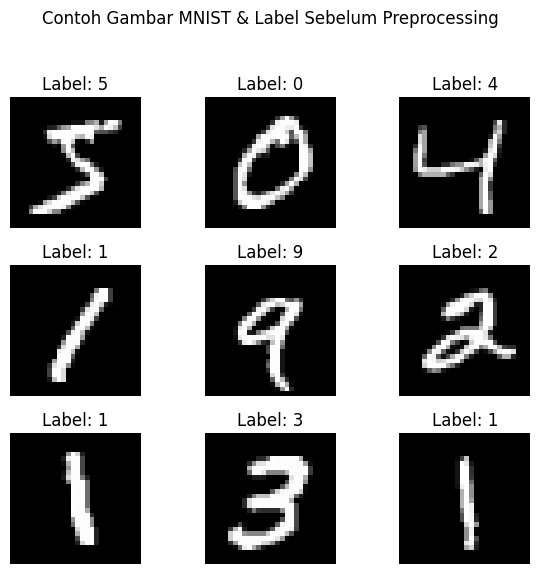

In [ ]:
# 3. Display beberapa sampel sebelum preprocessing
num_samples = 9
plt.figure(figsize=(6,6))
for i in range(num_samples):
    plt.subplot(3,3,i+1)
    plt.imshow(x_train_raw[i], cmap='gray')
    plt.title(f"Label: {y_train_raw[i]}")
    plt.axis('off')
plt.suptitle('Contoh Gambar MNIST & Label Sebelum Preprocessing')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

## 🧹 Preprocessing Data

### 🛠️ Normalisasi dan Reshaping
- **Reshape**: Menambah dimensi channel (1 channel untuk grayscale)
- **Normalisasi**: Mengubah range nilai piksel dari 0-255 menjadi 0-1
- **One-hot Encoding**: Mengubah label kelas ke format kategorikal

In [ ]:
# 4. Preprocess data
x_train = x_train_raw.reshape(-1,28,28,1).astype('float32') / 255.0
x_test = x_test_raw.reshape(-1,28,28,1).astype('float32') / 255.0

y_train = tf.keras.utils.to_categorical(y_train_raw, 10)
y_test = tf.keras.utils.to_categorical(y_test_raw, 10)

## 🧠 Arsitektur Model CNN

### 📐 Struktur Model

| Layer Type         | Fungsi                                                      | Contoh Parameter           |
|--------------------|-------------------------------------------------------------|----------------------------|
| 🔵 Input Layer     | Menerima gambar input 28x28 piksel grayscale                 | input_shape=(28,28,1)      |
| 🌀 Conv2D          | Mengekstraksi fitur dengan filter konvolusi                  | 32 filter, kernel 3x3      |
| ⚡ ReLU Activation | Memperkenalkan non-linearitas                                | activation='relu'          |
| 🔽 MaxPooling      | Reduksi dimensi dengan mengambil nilai maksimum             | pool size 2x2              |
| 🧩 Flatten         | Meratakan output untuk layer fully-connected                | -                          |
| 🔗 Dense           | Layer fully-connected untuk klasifikasi                     | 128 neuron                 |
| 🎯 Output          | Output probabilitas 10 kelas dengan softmax                 | 10 neuron                  |

In [ ]:
# 5. Build CNN model
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D((2,2)),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

## 🏋️ Pelatihan Model

### ⚙️ Konfigurasi Training
- **Optimizer**: Adam (Adaptive Moment Estimation)
- **Loss Function**: Categorical Cross-Entropy (sesuai klasifikasi multi-kelas)
- **Metric**: Akurasi sebagai ukuran performa

### 🛑 Teknik Regularisasi
- **Early Stopping**: Menghentikan training jika tidak ada peningkatan validasi loss
- **Dropout**: Menonaktifkan 50% neuron secara acak untuk mencegah overfitting

In [ ]:
# 6. Callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
model_ckpt = ModelCheckpoint('best-model.h5', monitor='val_accuracy', save_best_only=True)

# 7. Train model
history = model.fit(
    x_train, y_train,
    validation_split=0.1,
    epochs=20,
    batch_size=128,
    callbacks=[early_stop, model_ckpt]
)

Epoch 1/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7810 - loss: 0.6894

422/422 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.7813 - loss: 0.6885 - val_accuracy: 0.9837 - val_loss: 0.0569
Epoch 2/20
419/422 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9686 - loss: 0.1064

422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9686 - loss: 0.1063 - val_accuracy: 0.9870 - val_loss: 0.0418
Epoch 3/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9781 - loss: 0.0726

422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9781 - loss: 0.0726 - val_accuracy: 0.9887 - val_loss: 0.0390
Epoch 4/20
421/422 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9808 - loss: 0.0613

422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9808 - loss: 0.0613 - val_accuracy: 0.9900 - val_loss: 0.0324
Epoch 5/20
411/422 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9862 - loss: 0.0467

422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9861 - loss: 0.0468 - val_accuracy: 0.9903 - val_loss: 0.0338
Epoch 6/20
411/422 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9890 - loss: 0.0389

422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9890 - loss: 0.0389 - val_accuracy: 0.9905 - val_loss: 0.0301
Epoch 7/20
420/422 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9882 - loss: 0.0369

422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9882 - loss: 0.0369 - val_accuracy: 0.9913 - val_loss: 0.0340
Epoch 8/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9901 - loss: 0.0317 - val_accuracy: 0.9912 - val_loss: 0.0328
Epoch 9/20
420/422 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9904 - loss: 0.0297

422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9904 - loss: 0.0297 - val_accuracy: 0.9922 - val_loss: 0.0330
Epoch 10/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9917 - loss: 0.0271 - val_accuracy: 0.9917 - val_loss: 0.0353
Epoch 11/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9923 - loss: 0.0237 - val_accuracy: 0.9907 - val_loss: 0.0333
Epoch 12/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9936 - loss: 0.0198 - val_accuracy: 0.9913 - val_loss: 0.0353
Epoch 13/20
414/422 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9934 - loss: 0.0202

422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9934 - loss: 0.0201 - val_accuracy: 0.9927 - val_loss: 0.0366
Epoch 14/20
413/422 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9934 - loss: 0.0179

422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9934 - loss: 0.0179 - val_accuracy: 0.9928 - val_loss: 0.0290
Epoch 15/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9948 - loss: 0.0153 - val_accuracy: 0.9918 - val_loss: 0.0371
Epoch 16/20
416/422 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9953 - loss: 0.0140

422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9953 - loss: 0.0140 - val_accuracy: 0.9932 - val_loss: 0.0334
Epoch 17/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9956 - loss: 0.0134 - val_accuracy: 0.9932 - val_loss: 0.0345
Epoch 18/20
420/422 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9951 - loss: 0.0126

422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9951 - loss: 0.0126 - val_accuracy: 0.9935 - val_loss: 0.0342
Epoch 19/20
411/422 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9965 - loss: 0.0112

422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9964 - loss: 0.0112 - val_accuracy: 0.9938 - val_loss: 0.0304
Epoch 20/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9957 - loss: 0.0122 - val_accuracy: 0.9928 - val_loss: 0.0356


## 📊 Evaluasi Model

- Model diuji dengan data test yang belum pernah dilihat
- Akurasi umumnya mencapai >90% pada dataset MNIST
- Loss function menunjukkan seberapa baik model memprediksi

In [ ]:
# 8. Evaluate & save final model
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_acc*100:.2f}%")
model.save('final-model.h5')
print("Model saved!")

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9905 - loss: 0.0299


Test accuracy: 99.25%
Model saved!


## 🧪 Uji Coba dengan Gambar Eksternal

### 🖼️ Preprocessing Gambar
- Resize gambar ke 28x28 piksel
- Konversi ke grayscale
- Auto-invert warna untuk gambar dengan latar putih
- Normalisasi nilai piksel

### 🔮 Prediksi
- Model memberikan probabilitas untuk setiap kelas
- Kelas dengan probabilitas tertinggi dipilih sebagai hasil prediksi
- Confidence score menunjukkan tingkat keyakinan model

In [ ]:
# 9. Improved function to load and predict an external image
def load_and_predict(img_path, model_path='final-model.h5'):
    # Load model
    model = load_model(model_path)

    # Read image in grayscale
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    if img is None:
        raise ValueError(f"Tidak dapat membaca {img_path}")

    # Resize to 28x28
    img = cv2.resize(img, (28,28), interpolation=cv2.INTER_AREA)

    # Normalize to [0,1]
    img_norm = img.astype('float32') / 255.0

    # Otomatis invert jika latar putih
    if np.mean(img_norm) > 0.5:
        img_norm = 1.0 - img_norm

    # Thresholding untuk memperjelas digit
    _, img_thresh = cv2.threshold((img_norm * 255).astype('uint8'), 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    img_thresh = img_thresh.astype('float32') / 255.0

    # Tampilkan image untuk debugging
    plt.imshow(img_thresh, cmap='gray')
    plt.title('Preprocessed Input')
    plt.axis('off')
    plt.show()

    # Siapkan input untuk model
    img_array = img_thresh.reshape(1,28,28,1)

    # Prediksi
    preds = model.predict(img_array)
    predicted_class = np.argmax(preds, axis=1)[0]
    confidence = np.max(preds)
    return predicted_class, confidence

Upload gambar digit handwrite eksternal (PNG/JPG):


Saving Screenshot 2025-05-23 105324.png to Screenshot 2025-05-23 105324.png


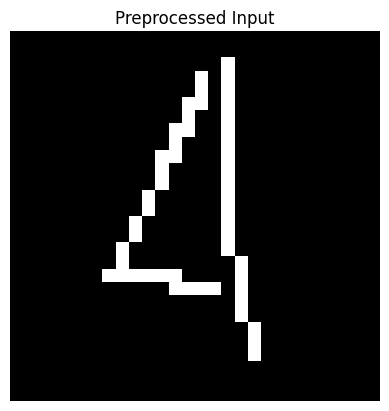

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 536ms/step
Image: Screenshot 2025-05-23 105324.png -> Predicted: 4 (Confidence 96.64%)


In [ ]:
# 10. Upload & test external image
print("Upload gambar digit handwrite eksternal (PNG/JPG):")
uploaded = files.upload()
for fname in uploaded.keys():
    pred, conf = load_and_predict(fname)
    print(f"Image: {fname} -> Predicted: {pred} (Confidence {conf*100:.2f}%)")

## 💡 Tips Pengembangan
1. Eksperimen dengan arsitektur berbeda (jumlah layer/filter)
2. Coba teknik augmentasi data untuk meningkatkan generalisasi
3. Gunakan learning rate scheduling untuk optimasi lebih baik
4. Implementasikan callback TensorBoard untuk visualisasi training

## 🚀 Tantangan Lanjutan
1. Modifikasi kode untuk klasifikasi dataset lain (CIFAR-10)
2. Implementasikan transfer learning dengan model pretrained
3. Buat visualisasi feature maps dari layer konvolusi
4. Deploy model sebagai web service menggunakan Flask/FastAPI